In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import zarr

In [16]:
def analyze_zarr_dataset(zarr_path):
    # Open the Zarr dataset
    zarr_data = zarr.open(zarr_path, mode='r')

    # Print the structure of the Zarr dataset
    print("Zarr Dataset Structure:")
    print(zarr_data.tree())
    
    # List all available arrays
    print("\nAvailable arrays:")
    for key in zarr_data.keys():
        print(f"- {key}")
    
    # Analyze the 'bands' array which likely contains the multispectral data
    if 'bands' in zarr_data:
        bands_data = zarr_data['bands'][:]
        print(f"\nBands data shape: {bands_data.shape}")
        bands_data = np.array(bands_data)  # Convert to numpy array for analysis
        # combining the first two dimensions into one dimensions
        bands_data = bands_data.reshape(-1, *bands_data.shape[2:])
        print(f"\nBands data shape: {bands_data.shape}")
        print(f"Bands data dtype: {bands_data.dtype}")

        # Calculate basic statistics
        mean = np.mean(bands_data)
        std_dev = np.std(bands_data)
        print(f"Mean: {mean}, Standard Deviation: {std_dev}")
        
        # Get min and max values
        min_val = np.min(bands_data)
        max_val = np.max(bands_data)
        print(f"Min value: {min_val}, Max value: {max_val}")

        # Plot each band from the first time step
        if len(bands_data.shape) >= 4:  # Assuming shape is (time, bands, height, width)
            num_bands = bands_data.shape[1]
            
            # Calculate number of rows needed (4 bands per row)
            bands_per_row = 4
            num_rows = int(np.ceil(num_bands / bands_per_row))
            
            # Create subplot grid
            fig, axs = plt.subplots(num_rows, bands_per_row, figsize=(16, 4 * num_rows))
            
            # Make axs 2D if it isn't already
            if num_rows == 1:
                axs = np.expand_dims(axs, axis=0)
            
            # Calculate global min and max for consistent color scaling
            global_min = np.min(bands_data[0])
            global_max = np.max(bands_data[0])
            print(f"Color scale range: [{global_min}, {global_max}]")
            
            # Plot each band
            for i in range(num_bands):
                # Calculate row and column for this band
                row = i // bands_per_row
                col = i % bands_per_row
                
                # Plot the band
                im = axs[row, col].imshow(bands_data[0, i], cmap='viridis', 
                                        vmin=global_min, vmax=global_max)
                axs[row, col].set_title(f'Band {i+1}')
            
            # Hide any unused subplots
            for i in range(num_bands, num_rows * bands_per_row):
                row = i // bands_per_row
                col = i % bands_per_row
                axs[row, col].axis('off')
            
            # Add a single colorbar for the entire figure
            cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])  # [x, y, width, height]
            fig.colorbar(im, cax=cbar_ax, label='Pixel Value')
            
            plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
            plt.show()
        
        # Plot cloud mask if available
        if 'cloud_mask' in zarr_data:
            cloud_mask = zarr_data['cloud_mask'][:]
            cloud_mask = np.array(cloud_mask)  # Convert to numpy array for analysis
            # combining the first two dimensions into one dimensions
            cloud_mask = cloud_mask.reshape(-1, *cloud_mask.shape[2:])
            print(f"\nCloud mask shape: {cloud_mask.shape}")
            print(f"Cloud mask dtype: {cloud_mask.dtype}")
            
            plt.figure(figsize=(6, 6))
            plt.imshow(cloud_mask[10], cmap='gray')
            plt.title('Cloud Mask')
            plt.colorbar()
            plt.show()
    else:
        print("No 'bands' array found in the Zarr dataset.")
        
    # Try to extract and print metadata if available
    print("\nMetadata:")
    try:
        if hasattr(zarr_data, 'attrs'):
            for key, value in zarr_data.attrs.items():
                print(f"{key}: {value}")
    except Exception as e:
        print(f"Error accessing metadata: {e}")

# Example usage:
# analyze_zarr_dataset('ssl4eos12_train_seasonal_data_000001.zarr')

Zarr Dataset Structure:


/
├── band (12,) <U3
├── bands (64, 4, 12, 264, 264) int16
├── center_lat (64,) float64
├── center_lon (64,) float64
├── cloud_mask (64, 4, 264, 264) uint8
├── crs (64,) int64
├── file_id (64, 4) <U38
├── sample (64,) <U7
├── sample_id (64, 4) <U9
├── time (4,) int64
├── time_ (64, 4) int64
├── x (264,) int64
├── x_ (64, 264) float64
├── y (264,) int64
└── y_ (64, 264) float64



Available arrays:
- band
- bands
- center_lat
- center_lon
- cloud_mask
- crs
- file_id
- sample
- sample_id
- time
- time_
- x
- x_
- y
- y_

Bands data shape: (64, 4, 12, 264, 264)

Bands data shape: (256, 12, 264, 264)
Bands data dtype: int16
Mean: 2853.654321446928, Standard Deviation: 1315.680477731953
Min value: 1001, Max value: 20216
Color scale range: [1103, 5655]


C:\Users\Marcus\AppData\Local\Temp\ipykernel_25612\3840816692.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


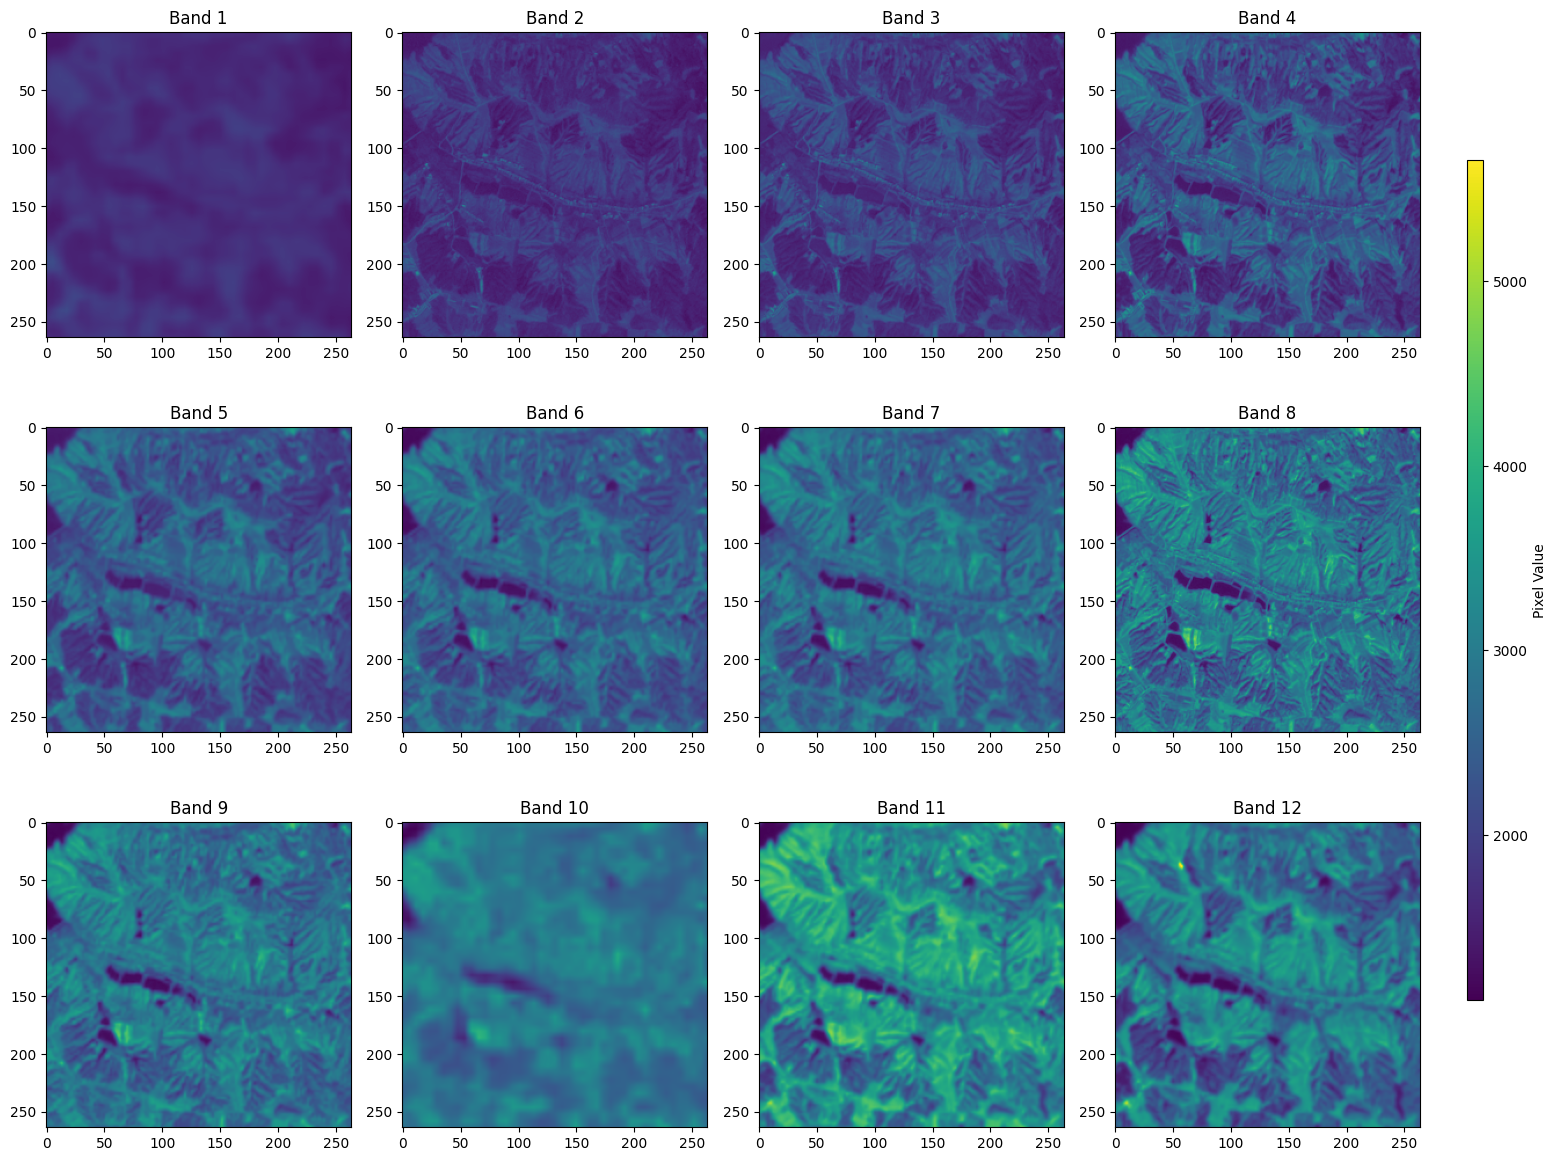


Cloud mask shape: (256, 264, 264)
Cloud mask dtype: uint8


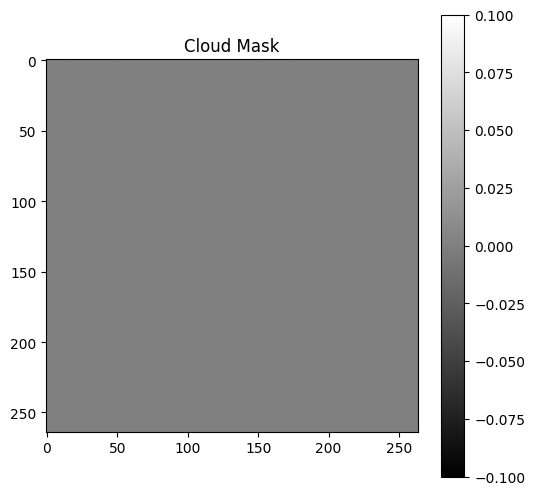


Metadata:


In [17]:
analyze_zarr_dataset('../data/ssl4eos12_val_seasonal_data_000001.zarr')